### Simple Univariate Linear Regression

Hypothesis: $h_{\theta}(x) = \theta_{0} + \theta_{1}x$ <br>
Parameters: $\theta_{0}, \theta_{1}$ <br>
Cost Function (Squared Error): $J(\theta_{0}, \theta_{1}) = \frac{1}{2m}\displaystyle\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})^2$ , $m$ is the size of training set<br>
Goal: $minimize_{\theta_{0}, \theta_{1}}J(\theta_{0}, \theta_{1})$ <br>
Gradiant Descent is used to find best $\theta_{i}$ <br>
<br>
Outline:
- Start with some $\theta_{0}, \theta_{1}$
- Keep changing $\theta_{0}, \theta_{1}$ to reduce $J(\theta_{0}, \theta_{1})$ until we hopefully end up at a minimum <br>
<br> 

Gradient Descent Algorithm: repeat until converge <br>
$\theta_{j} := \theta_{j} - \alpha\frac{\partial}{\partial\theta_{j}}J(\theta_{0}, \theta_{1})$ <br>
$\theta_{j} := \theta_{j} - \alpha\frac{1}{m}\displaystyle\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})x_{j}^{(i)}$ <br>
<br>
$\alpha$ is the learning rate: 
- If $\alpha$ is too small, gradiant descent can be slow; 
- If $\alpha$ is too large, gradient descent can overshoot the minimum. It may fail to converge, or even diverge. <br>

Implementation Steps: Simultaneous Update $\theta_{0}, \theta_{1}$<br>
$temp0 := \theta_{0} - \alpha\frac{\partial}{\partial\theta_{0}}J(\theta_{0}, \theta_{1})$ <br>
$temp1 := \theta_{1} - \alpha\frac{\partial}{\partial\theta_{1}}J(\theta_{0}, \theta_{1})$ <br>
$\theta_{0} := temp0$ <br>
$\theta_{1} := temp1$ <br>

### Multivariate Linear Regression

Hypothesis: $h_{\theta}(X) = \theta\cdot X$ <br>
$\theta\in R^{n+1}$, $J(\theta_{0}, \theta_{1}, ..., \theta_{m}) = \frac{1}{2m}\displaystyle\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})^2$ <br>
$\frac{\partial}{\partial\theta_{j}}J(\theta) = ... = 0$ (for every $j$) <br>
Solve for $\theta_{0}, \theta_{1}, ..., \theta_{n}$ <br>
*Gradient Descent* still applies for multivariate linear regression
*Normal Equatoin Approach* (for smaller sample size n > 1000, or less complicated problems): <br>
$\theta = (X^{T}X)^{-1}X^{T}y$<br>
$X$ represents feature matrix X, $y$ represents target vector y <br>
$(X^{T}X)^{-1}$ is inverse of matrix $(X^{T}X)$

### Implement linear regression using numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
N = 100
x = np.linspace(1.0, 10.0, N).reshape(N, 1)
y = np.sin(x) + 0.1*np.power(x,2) + 0.5 * np.random.randn(N,1)

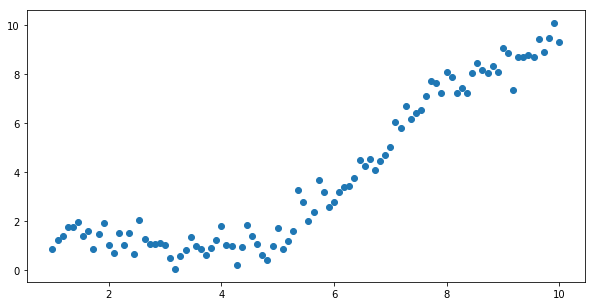

In [3]:
plt.figure(figsize=(10, 5))
plt.scatter(x, y)

In order to simplify model, we use a trick which consists in including the intercept in the input values, this way we don't have to carry the bias $\theta_{0}$ term through the calculation, that’s done by adding a column of ones to the data, this way our model becomes simply $y=\theta^Tx$.

In [4]:
def gradient_descent(x, y, iteration, alpha=0.05, tolerance=1e-4):
    '''Use gradient descent to get parameter vector theta for linear regression
    Args:
        x: feature matrix with shape (m, n)
        y: target vector with shape (m, 1)
        theta: starting theta vector for gradient descent with shape (n+1, 1)
        alpha: learning rate for gradient descent
        iteration: number of max iterations
        tolerance: set threshold to determine when to converge 
                   based on old vs. new paramter changes at end of each iteration
    Returns:
        Parameter vector, array like'''
    N = x.shape[0]
    x = np.hstack((x, np.ones(N).reshape(N, 1)))
    theta = np.zeros(x.shape[1]).reshape(x.shape[1], 1)
    x_trans = x.transpose()
    for i in range(0, iteration):      
        hypothesis = np.dot(x, theta)
        error = hypothesis - y
        cost = np.sum(error ** 2) / (2 * len(x))
        gradient = np.dot(x_trans, error) / len(x)
        print("Iteration {} | Cost: {} | Gradient: {}".format(i, cost, gradient))
        # update theta
        theta_new = theta - alpha * gradient
        if sum(abs(theta_new - theta)).all() < tolerance:
            break
        theta = theta_new
    return theta_new

In [5]:
theta_gd = gradient_descent(x, y, iteration= 1000)
theta_gd

Iteration 0 | Cost: 12.175539275336565 | Gradient: [[-28.5115402 ]
 [ -3.83736739]]
Iteration 1 | Cost: 10.052212971299426 | Gradient: [[25.48448206]
 [ 4.19517454]]
Iteration 2 | Cost: 8.339508415248211 | Gradient: [[-22.98924058]
 [ -3.02281676]]
Iteration 3 | Cost: 6.95776940802549 | Gradient: [[20.52887393]
 [ 3.45036524]]
Iteration 4 | Cost: 5.842796684291461 | Gradient: [[-18.53836287]
 [ -2.36759335]]
Iteration 5 | Cost: 4.9428484816530265 | Gradient: [[16.53509454]
 [ 2.84883611]]
Iteration 6 | Cost: 4.216223153314221 | Gradient: [[-14.95099957]
 [ -1.8407567 ]]
Iteration 7 | Cost: 3.6293108779077436 | Gradient: [[13.31649636]
 [ 2.36280602]]
Iteration 8 | Cost: 3.1550234375591697 | Gradient: [[-12.05958786]
 [ -1.41737078]]
Iteration 9 | Cost: 2.7715286995277926 | Gradient: [[10.72265111]
 [ 1.96988442]]
Iteration 10 | Cost: 2.4612306732799074 | Gradient: [[-9.72908064]
 [-1.07733886]]
Iteration 11 | Cost: 2.2099474887477992 | Gradient: [[8.63232137]
 [1.65202526]]
Iteration 1

Iteration 423 | Cost: 0.8305995576919364 | Gradient: [[-0.00125186]
 [ 0.00841138]]
Iteration 424 | Cost: 0.8305959581721083 | Gradient: [[-0.00124051]
 [ 0.00833507]]
Iteration 425 | Cost: 0.8305924236640451 | Gradient: [[-0.00122925]
 [ 0.00825946]]
Iteration 426 | Cost: 0.8305889529935544 | Gradient: [[-0.0012181 ]
 [ 0.00818453]]
Iteration 427 | Cost: 0.8305855450076508 | Gradient: [[-0.00120705]
 [ 0.00811028]]
Iteration 428 | Cost: 0.8305821985741731 | Gradient: [[-0.0011961 ]
 [ 0.00803671]]
Iteration 429 | Cost: 0.8305789125814093 | Gradient: [[-0.00118525]
 [ 0.0079638 ]]
Iteration 430 | Cost: 0.830575685937725 | Gradient: [[-0.0011745 ]
 [ 0.00789155]]
Iteration 431 | Cost: 0.8305725175712033 | Gradient: [[-0.00116384]
 [ 0.00781996]]
Iteration 432 | Cost: 0.8305694064292859 | Gradient: [[-0.00115329]
 [ 0.00774902]]
Iteration 433 | Cost: 0.8305663514784264 | Gradient: [[-0.00114282]
 [ 0.00767873]]
Iteration 434 | Cost: 0.830563351703745 | Gradient: [[-0.00113246]
 [ 0.00760

 [ 1.67114635e-04]]
Iteration 854 | Cost: 0.8304003395796801 | Gradient: [[-2.46460323e-05]
 [ 1.65598610e-04]]
Iteration 855 | Cost: 0.8304003381845207 | Gradient: [[-2.44224493e-05]
 [ 1.64096339e-04]]
Iteration 856 | Cost: 0.8304003368145598 | Gradient: [[-2.42008946e-05]
 [ 1.62607695e-04]]
Iteration 857 | Cost: 0.8304003354693421 | Gradient: [[-2.39813497e-05]
 [ 1.61132556e-04]]
Iteration 858 | Cost: 0.8304003341484205 | Gradient: [[-2.37637966e-05]
 [ 1.59670800e-04]]
Iteration 859 | Cost: 0.8304003328513566 | Gradient: [[-2.35482170e-05]
 [ 1.58222304e-04]]
Iteration 860 | Cost: 0.8304003315777192 | Gradient: [[-2.33345931e-05]
 [ 1.56786948e-04]]
Iteration 861 | Cost: 0.8304003303270855 | Gradient: [[-2.31229072e-05]
 [ 1.55364614e-04]]
Iteration 862 | Cost: 0.8304003290990393 | Gradient: [[-2.29131416e-05]
 [ 1.53955183e-04]]
Iteration 863 | Cost: 0.8304003278931734 | Gradient: [[-2.27052790e-05]
 [ 1.52558538e-04]]
Iteration 864 | Cost: 0.8304003267090869 | Gradient: [[-2.24

array([[ 1.07542568],
       [-2.07743008]])

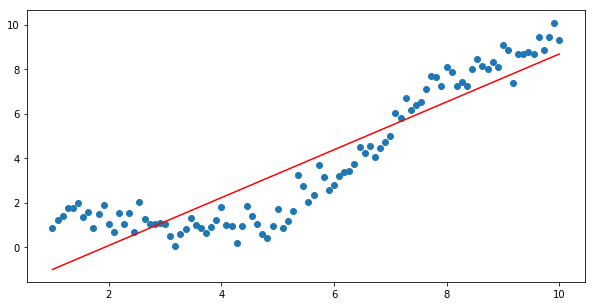

In [6]:
x_modify = np.hstack((x, np.ones(N).reshape(N, 1)))
# get fitted line
y_estimate = np.dot(x_modify, theta_gd)

# plot with original x, y
plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.plot(x, y_estimate, color='red')

### Apply same data using sklearn

In [7]:
reg = LinearRegression().fit(x, y)
theta_sklearn = np.vstack((reg.coef_, reg.intercept_.reshape(1,1)))
theta_sklearn

array([[ 1.07546159],
       [-2.07767134]])

In [8]:
theta_gd

array([[ 1.07542568],
       [-2.07743008]])

In [9]:
sum(abs(theta_gd - theta_sklearn))

array([0.00027717])

### Try multivariate linear regression

In [10]:
x_mv = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y_mv = (np.dot(x_mv, np.array([1, 2])) + 3).reshape(4, 1) +  0.5 * np.random.randn(4,1)
reg_mv = LinearRegression().fit(x_mv, y_mv)
np.vstack((reg_mv.coef_.reshape(x_mv.shape[1], 1), reg_mv.intercept_.reshape(1,1)))

array([[1.53340991],
       [1.80475693],
       [2.01017816]])

In [11]:
np.array([[1, 1], [1, 2], [2, 2], [2, 3]])

array([[1, 1],
       [1, 2],
       [2, 2],
       [2, 3]])

In [12]:
y_mv

array([[ 5.22133685],
       [ 7.28011011],
       [ 8.81352002],
       [10.36426063]])

In [13]:
theta_mv = np.ones(x_mv.shape[1]+1).reshape(x_mv.shape[1]+1, 1)
gradient_descent(x_mv, y_mv, iteration=10000)

Iteration 0 | Cost: 33.1697993992294 | Gradient: [[-12.71425206]
 [-17.12534475]
 [ -7.9198069 ]]
Iteration 1 | Cost: 12.345259085551074 | Gradient: [[ -7.74811652]
 [-10.41409553]
 [ -4.85771318]]
Iteration 2 | Cost: 4.617896198560512 | Gradient: [[-4.72298294]
 [-6.32608378]
 [-2.99230923]]
Iteration 3 | Cost: 1.7503184359541926 | Gradient: [[-2.88019827]
 [-3.83599928]
 [-1.85586167]]
Iteration 4 | Cost: 0.6859944573691137 | Gradient: [[-1.75763397]
 [-2.31928106]
 [-1.16345378]]
Iteration 5 | Cost: 0.2907808788498883 | Gradient: [[-1.07378752]
 [-1.39548192]
 [-0.74153044]]
Iteration 6 | Cost: 0.14384731268479464 | Gradient: [[-0.65718349]
 [-0.83285497]
 [-0.48437166]]
Iteration 7 | Cost: 0.08904221980983124 | Gradient: [[-0.40336874]
 [-0.49023312]
 [-0.32757882]]
Iteration 8 | Cost: 0.06842465513232025 | Gradient: [[-0.24871636]
 [-0.28162537]
 [-0.23192391]]
Iteration 9 | Cost: 0.06049527387686035 | Gradient: [[-0.1544684 ]
 [-0.15465086]
 [-0.17351145]]
Iteration 10 | Cost: 0.

Iteration 489 | Cost: 0.008896033317834508 | Gradient: [[ 0.00312754]
 [ 0.00254108]
 [-0.01064305]]
Iteration 490 | Cost: 0.008889570666326127 | Gradient: [[ 0.0031219 ]
 [ 0.00252541]
 [-0.01059957]]
Iteration 491 | Cost: 0.008883159817069053 | Gradient: [[ 0.00311625]
 [ 0.00250984]
 [-0.01055628]]
Iteration 492 | Cost: 0.008876800339370904 | Gradient: [[ 0.00311059]
 [ 0.00249437]
 [-0.01051317]]
Iteration 493 | Cost: 0.00887049180627374 | Gradient: [[ 0.00310492]
 [ 0.00247898]
 [-0.01047024]]
Iteration 494 | Cost: 0.008864233794520124 | Gradient: [[ 0.00309924]
 [ 0.00246368]
 [-0.01042749]]
Iteration 495 | Cost: 0.00885802588451971 | Gradient: [[ 0.00309355]
 [ 0.00244848]
 [-0.01038493]]
Iteration 496 | Cost: 0.00885186766031576 | Gradient: [[ 0.00308785]
 [ 0.00243336]
 [-0.01034255]]
Iteration 497 | Cost: 0.008845758709552752 | Gradient: [[ 0.00308214]
 [ 0.00241833]
 [-0.01030035]]
Iteration 498 | Cost: 0.008839698623443264 | Gradient: [[ 0.00307642]
 [ 0.0024034 ]
 [-0.0102

Iteration 996 | Cost: 0.008083945791110051 | Gradient: [[ 7.92487174e-04]
 [ 6.90528253e-05]
 [-1.43676596e-03]]
Iteration 997 | Cost: 0.00808381118462773 | Gradient: [[ 7.89962640e-04]
 [ 6.84133696e-05]
 [-1.43126948e-03]]
Iteration 998 | Cost: 0.008083677568646528 | Gradient: [[ 7.87445348e-04]
 [ 6.77783805e-05]
 [-1.42579454e-03]]
Iteration 999 | Cost: 0.008083544935809239 | Gradient: [[ 7.84935283e-04]
 [ 6.71478299e-05]
 [-1.42034105e-03]]
Iteration 1000 | Cost: 0.008083413278814622 | Gradient: [[ 7.82432430e-04]
 [ 6.65216900e-05]
 [-1.41490893e-03]]
Iteration 1001 | Cost: 0.008083282590415963 | Gradient: [[ 7.79936771e-04]
 [ 6.58999329e-05]
 [-1.40949808e-03]]
Iteration 1002 | Cost: 0.008083152863421261 | Gradient: [[ 7.77448292e-04]
 [ 6.52825312e-05]
 [-1.40410843e-03]]
Iteration 1003 | Cost: 0.00808302409069253 | Gradient: [[ 7.74966976e-04]
 [ 6.46694574e-05]
 [-1.39873988e-03]]
Iteration 1004 | Cost: 0.008082896265145707 | Gradient: [[ 7.72492809e-04]
 [ 6.40606843e-05]


Iteration 1424 | Cost: 0.008066348528322585 | Gradient: [[ 1.89330145e-04]
 [-9.59285952e-06]
 [-2.86060916e-04]]
Iteration 1425 | Cost: 0.008066342650572577 | Gradient: [[ 1.88677286e-04]
 [-9.59452317e-06]
 [-2.84998345e-04]]
Iteration 1426 | Cost: 0.008066336815422192 | Gradient: [[ 1.88026611e-04]
 [-9.59597986e-06]
 [-2.83939772e-04]]
Iteration 1427 | Cost: 0.008066331022562125 | Gradient: [[ 1.87378114e-04]
 [-9.59723145e-06]
 [-2.82885181e-04]]
Iteration 1428 | Cost: 0.008066325271685248 | Gradient: [[ 1.86731789e-04]
 [-9.59827979e-06]
 [-2.81834558e-04]]
Iteration 1429 | Cost: 0.008066319562486603 | Gradient: [[ 1.86087627e-04]
 [-9.59912672e-06]
 [-2.80787886e-04]]
Iteration 1430 | Cost: 0.008066313894663515 | Gradient: [[ 1.85445623e-04]
 [-9.59977406e-06]
 [-2.79745151e-04]]
Iteration 1431 | Cost: 0.008066308267915743 | Gradient: [[ 1.84805770e-04]
 [-9.60022360e-06]
 [-2.78706338e-04]]
Iteration 1432 | Cost: 0.008066302681944915 | Gradient: [[ 1.84168060e-04]
 [-9.60047715

Iteration 1889 | Cost: 0.008065564304516225 | Gradient: [[ 3.69455911e-05]
 [-3.86337175e-06]
 [-5.14560913e-05]]
Iteration 1890 | Cost: 0.008065564103499002 | Gradient: [[ 3.68143970e-05]
 [-3.85216253e-06]
 [-5.12678689e-05]]
Iteration 1891 | Cost: 0.008065563903934116 | Gradient: [[ 3.66836639e-05]
 [-3.84097858e-06]
 [-5.10803390e-05]]
Iteration 1892 | Cost: 0.00806556370581099 | Gradient: [[ 3.65533904e-05]
 [-3.82981989e-06]
 [-5.08934990e-05]]
Iteration 1893 | Cost: 0.00806556350911923 | Gradient: [[ 3.64235747e-05]
 [-3.81868646e-06]
 [-5.07073463e-05]]
Iteration 1894 | Cost: 0.008065563313848435 | Gradient: [[ 3.62942154e-05]
 [-3.80757827e-06]
 [-5.05218785e-05]]
Iteration 1895 | Cost: 0.008065563119988505 | Gradient: [[ 3.61653108e-05]
 [-3.79649532e-06]
 [-5.03370929e-05]]
Iteration 1896 | Cost: 0.008065562927529104 | Gradient: [[ 3.60368594e-05]
 [-3.78543760e-06]
 [-5.01529870e-05]]
Iteration 1897 | Cost: 0.008065562736460108 | Gradient: [[ 3.59088596e-05]
 [-3.77440510e-

 [-1.03205575e-05]]
Iteration 2330 | Cost: 0.008065537613289842 | Gradient: [[ 7.62215482e-06]
 [-9.48831720e-07]
 [-1.02830469e-05]]
Iteration 2331 | Cost: 0.008065537605067724 | Gradient: [[ 7.59479914e-06]
 [-9.45640052e-07]
 [-1.02456730e-05]]
Iteration 2332 | Cost: 0.008065537596905146 | Gradient: [[ 7.56754123e-06]
 [-9.42458602e-07]
 [-1.02084353e-05]]
Iteration 2333 | Cost: 0.008065537588801398 | Gradient: [[ 7.54038074e-06]
 [-9.39287338e-07]
 [-1.01713332e-05]]
Iteration 2334 | Cost: 0.008065537580756192 | Gradient: [[ 7.51331733e-06]
 [-9.36126235e-07]
 [-1.01343664e-05]]
Iteration 2335 | Cost: 0.008065537572769024 | Gradient: [[ 7.48635066e-06]
 [-9.32975262e-07]
 [-1.00975342e-05]]
Iteration 2336 | Cost: 0.008065537564839641 | Gradient: [[ 7.45948038e-06]
 [-9.29834385e-07]
 [-1.00608363e-05]]
Iteration 2337 | Cost: 0.008065537556967463 | Gradient: [[ 7.43270614e-06]
 [-9.26703580e-07]
 [-1.00242721e-05]]
Iteration 2338 | Cost: 0.008065537549152124 | Gradient: [[ 7.4060276

 [-1.68267722e-06]]
Iteration 2829 | Cost: 0.008065536505214034 | Gradient: [[ 1.26110441e-06]
 [-1.68288850e-07]
 [-1.67658004e-06]]
Iteration 2830 | Cost: 0.008065536504992924 | Gradient: [[ 1.25655680e-06]
 [-1.67695323e-07]
 [-1.67050499e-06]]
Iteration 2831 | Cost: 0.00806553650477344 | Gradient: [[ 1.25202557e-06]
 [-1.67103857e-07]
 [-1.66445197e-06]]
Iteration 2832 | Cost: 0.008065536504555512 | Gradient: [[ 1.24751064e-06]
 [-1.66514449e-07]
 [-1.65842090e-06]]
Iteration 2833 | Cost: 0.00806553650433927 | Gradient: [[ 1.24301198e-06]
 [-1.65927088e-07]
 [-1.65241171e-06]]
Iteration 2834 | Cost: 0.008065536504124476 | Gradient: [[ 1.23852951e-06]
 [-1.65341768e-07]
 [-1.64642431e-06]]
Iteration 2835 | Cost: 0.008065536503911263 | Gradient: [[ 1.23406318e-06]
 [-1.64758484e-07]
 [-1.64045863e-06]]
Iteration 2836 | Cost: 0.008065536503699561 | Gradient: [[ 1.22961294e-06]
 [-1.64177230e-07]
 [-1.63451459e-06]]
Iteration 2837 | Cost: 0.008065536503489413 | Gradient: [[ 1.22517871e

Iteration 3290 | Cost: 0.008065536475678274 | Gradient: [[ 2.38105469e-07]
 [-3.25451877e-08]
 [-3.14859999e-07]]
Iteration 3291 | Cost: 0.008065536475670472 | Gradient: [[ 2.37245378e-07]
 [-3.24286589e-08]
 [-3.13720390e-07]]
Iteration 3292 | Cost: 0.008065536475662698 | Gradient: [[ 2.36388392e-07]
 [-3.23125460e-08]
 [-3.12584908e-07]]
Iteration 3293 | Cost: 0.008065536475654951 | Gradient: [[ 2.35534500e-07]
 [-3.21968467e-08]
 [-3.11453538e-07]]
Iteration 3294 | Cost: 0.00806553647564729 | Gradient: [[ 2.34683691e-07]
 [-3.20815570e-08]
 [-3.10326263e-07]]
Iteration 3295 | Cost: 0.008065536475639712 | Gradient: [[ 2.33835952e-07]
 [-3.19666804e-08]
 [-3.09203071e-07]]
Iteration 3296 | Cost: 0.00806553647563216 | Gradient: [[ 2.32991274e-07]
 [-3.18522124e-08]
 [-3.08083946e-07]]
Iteration 3297 | Cost: 0.00806553647562469 | Gradient: [[ 2.32149647e-07]
 [-3.17381501e-08]
 [-3.06968872e-07]]
Iteration 3298 | Cost: 0.008065536475617219 | Gradient: [[ 2.31311055e-07]
 [-3.16244981e-0

 [-4.90351324e-08]]
Iteration 3804 | Cost: 0.008065536474619907 | Gradient: [[ 3.70347706e-08]
 [-5.11468978e-09]
 [-4.88577421e-08]]
Iteration 3805 | Cost: 0.008065536474619803 | Gradient: [[ 3.69008921e-08]
 [-5.09626030e-09]
 [-4.86809939e-08]]
Iteration 3806 | Cost: 0.008065536474619531 | Gradient: [[ 3.67674977e-08]
 [-5.07789699e-09]
 [-4.85048848e-08]]
Iteration 3807 | Cost: 0.008065536474619401 | Gradient: [[ 3.66345858e-08]
 [-5.05959896e-09]
 [-4.83294127e-08]]
Iteration 3808 | Cost: 0.008065536474619217 | Gradient: [[ 3.65021526e-08]
 [-5.04136910e-09]
 [-4.81545765e-08]]
Iteration 3809 | Cost: 0.008065536474619033 | Gradient: [[ 3.63701991e-08]
 [-5.02320341e-09]
 [-4.79803723e-08]]
Iteration 3810 | Cost: 0.008065536474618794 | Gradient: [[ 3.62387225e-08]
 [-5.00510344e-09]
 [-4.78067983e-08]]
Iteration 3811 | Cost: 0.008065536474618641 | Gradient: [[ 3.61077213e-08]
 [-4.98706765e-09]
 [-4.76338524e-08]]
Iteration 3812 | Cost: 0.008065536474618435 | Gradient: [[ 3.5977193

 [-9.77605086e-09]]
Iteration 4249 | Cost: 0.008065536474594813 | Gradient: [[ 7.38951167e-09]
 [-1.02410858e-09]
 [-9.74069048e-09]]
Iteration 4250 | Cost: 0.008065536474594806 | Gradient: [[ 7.36279082e-09]
 [-1.02041242e-09]
 [-9.70545910e-09]]
Iteration 4251 | Cost: 0.00806553647459477 | Gradient: [[ 7.33616967e-09]
 [-1.01672559e-09]
 [-9.67035363e-09]]
Iteration 4252 | Cost: 0.008065536474594761 | Gradient: [[ 7.30964245e-09]
 [-1.01305520e-09]
 [-9.63537627e-09]]
Iteration 4253 | Cost: 0.008065536474594782 | Gradient: [[ 7.28321092e-09]
 [-1.00939834e-09]
 [-9.60052571e-09]]
Iteration 4254 | Cost: 0.008065536474594747 | Gradient: [[ 7.25687710e-09]
 [-1.00575170e-09]
 [-9.56579993e-09]]
Iteration 4255 | Cost: 0.008065536474594712 | Gradient: [[ 7.23063609e-09]
 [-1.00212150e-09]
 [-9.53120116e-09]]
Iteration 4256 | Cost: 0.008065536474594763 | Gradient: [[ 7.20449211e-09]
 [-9.98501282e-10]
 [-9.49672607e-09]]
Iteration 4257 | Cost: 0.008065536474594811 | Gradient: [[ 7.17844229

 [-1.57991176e-09]]
Iteration 4752 | Cost: 0.008065536474593744 | Gradient: [[ 1.19466304e-09]
 [-1.65834457e-10]
 [-1.57419811e-09]]
Iteration 4753 | Cost: 0.008065536474593828 | Gradient: [[ 1.19034449e-09]
 [-1.65232716e-10]
 [-1.56850377e-09]]
Iteration 4754 | Cost: 0.00806553647459377 | Gradient: [[ 1.18603904e-09]
 [-1.64636749e-10]
 [-1.56283142e-09]]
Iteration 4755 | Cost: 0.008065536474593772 | Gradient: [[ 1.18175003e-09]
 [-1.64041669e-10]
 [-1.55717905e-09]]
Iteration 4756 | Cost: 0.0080655364745938 | Gradient: [[ 1.17747767e-09]
 [-1.63447034e-10]
 [-1.55154645e-09]]
Iteration 4757 | Cost: 0.008065536474593826 | Gradient: [[ 1.17321863e-09]
 [-1.62857505e-10]
 [-1.54593560e-09]]
Iteration 4758 | Cost: 0.008065536474593826 | Gradient: [[ 1.16897581e-09]
 [-1.62269087e-10]
 [-1.54034452e-09]]
Iteration 4759 | Cost: 0.008065536474593798 | Gradient: [[ 1.16474741e-09]
 [-1.61684000e-10]
 [-1.53477409e-09]]
Iteration 4760 | Cost: 0.008065536474593769 | Gradient: [[ 1.16053678e-

 [-3.15069970e-10]]
Iteration 5197 | Cost: 0.008065536474593746 | Gradient: [[ 2.38273623e-10]
 [-3.30939720e-11]
 [-3.13929993e-10]]
Iteration 5198 | Cost: 0.008065536474593774 | Gradient: [[ 2.37412756e-10]
 [-3.29731797e-11]
 [-3.12794235e-10]]
Iteration 5199 | Cost: 0.008065536474593744 | Gradient: [[ 2.36552777e-10]
 [-3.28557181e-11]
 [-3.11663806e-10]]
Iteration 5200 | Cost: 0.008065536474593744 | Gradient: [[ 2.35697017e-10]
 [-3.27371463e-11]
 [-3.10536707e-10]]
Iteration 5201 | Cost: 0.008065536474593802 | Gradient: [[ 2.34844810e-10]
 [-3.26185745e-11]
 [-3.09413606e-10]]
Iteration 5202 | Cost: 0.008065536474593802 | Gradient: [[ 2.33996156e-10]
 [-3.24997806e-11]
 [-3.08294057e-10]]
Iteration 5203 | Cost: 0.00806553647459383 | Gradient: [[ 2.33150832e-10]
 [-3.23812088e-11]
 [-3.07178727e-10]]
Iteration 5204 | Cost: 0.008065536474593772 | Gradient: [[ 2.32307062e-10]
 [-3.22648575e-11]
 [-3.06068060e-10]]
Iteration 5205 | Cost: 0.008065536474593774 | Gradient: [[ 2.31465069

Iteration 5713 | Cost: 0.008065536474593772 | Gradient: [[ 3.67434971e-11]
 [-5.10347320e-12]
 [-4.84057239e-11]]
Iteration 5714 | Cost: 0.008065536474593772 | Gradient: [[ 3.66098263e-11]
 [-5.08593168e-12]
 [-4.82311968e-11]]
Iteration 5715 | Cost: 0.008065536474593744 | Gradient: [[ 3.64772657e-11]
 [-5.06772402e-12]
 [-4.80568918e-11]]
Iteration 5716 | Cost: 0.008065536474593715 | Gradient: [[ 3.63455932e-11]
 [-5.04929432e-12]
 [-4.78830309e-11]]
Iteration 5717 | Cost: 0.0080655364745938 | Gradient: [[ 3.62134767e-11]
 [-5.03175279e-12]
 [-4.77100581e-11]]
Iteration 5718 | Cost: 0.008065536474593744 | Gradient: [[ 3.60829144e-11]
 [-5.01310105e-12]
 [-4.75373074e-11]]
Iteration 5719 | Cost: 0.008065536474593717 | Gradient: [[ 3.59525743e-11]
 [-4.99467134e-12]
 [-4.73652229e-11]]
Iteration 5720 | Cost: 0.008065536474593828 | Gradient: [[ 3.58229002e-11]
 [-4.97601960e-12]
 [-4.71938044e-11]]
Iteration 5721 | Cost: 0.00806553647459383 | Gradient: [[ 3.56932262e-11]
 [-4.95825603e-1

Iteration 6209 | Cost: 0.0080655364745938 | Gradient: [[ 6.09090556e-12]
 [-8.47100168e-13]
 [-8.02535816e-12]]
Iteration 6210 | Cost: 0.0080655364745938 | Gradient: [[ 6.07003336e-12]
 [-8.42437231e-13]
 [-7.99560418e-12]]
Iteration 6211 | Cost: 0.008065536474593772 | Gradient: [[ 6.04760686e-12]
 [-8.40216785e-13]
 [-7.96696042e-12]]
Iteration 6212 | Cost: 0.008065536474593772 | Gradient: [[ 6.02584649e-12]
 [-8.36886116e-13]
 [-7.93809463e-12]]
Iteration 6213 | Cost: 0.0080655364745938 | Gradient: [[ 6.00341998e-12]
 [-8.34665670e-13]
 [-7.90989496e-12]]
Iteration 6214 | Cost: 0.008065536474593772 | Gradient: [[ 5.98232575e-12]
 [-8.30890912e-13]
 [-7.88080712e-12]]
Iteration 6215 | Cost: 0.00806553647459383 | Gradient: [[ 5.95967720e-12]
 [-8.29114555e-13]
 [-7.85282950e-12]]
Iteration 6216 | Cost: 0.0080655364745938 | Gradient: [[ 5.93947114e-12]
 [-8.24451618e-13]
 [-7.82374165e-12]]
Iteration 6217 | Cost: 0.0080655364745938 | Gradient: [[ 5.91815486e-12]
 [-8.20898904e-13]
 [-7.

Iteration 6692 | Cost: 0.0080655364745938 | Gradient: [[ 1.05848663e-12]
 [-1.46993528e-13]
 [-1.39466216e-12]]
Iteration 6693 | Cost: 0.008065536474593772 | Gradient: [[ 1.05560005e-12]
 [-1.45661261e-13]
 [-1.38911105e-12]]
Iteration 6694 | Cost: 0.008065536474593744 | Gradient: [[ 1.05004894e-12]
 [-1.47215573e-13]
 [-1.38489220e-12]]
Iteration 6695 | Cost: 0.008065536474593772 | Gradient: [[ 1.04716236e-12]
 [-1.45217172e-13]
 [-1.37934109e-12]]
Iteration 6696 | Cost: 0.008065536474593772 | Gradient: [[ 1.04272146e-12]
 [-1.45661261e-13]
 [-1.37490019e-12]]
Iteration 6697 | Cost: 0.008065536474593772 | Gradient: [[ 1.04094511e-12]
 [-1.42552636e-13]
 [-1.36868294e-12]]
Iteration 6698 | Cost: 0.008065536474593772 | Gradient: [[ 1.03650422e-12]
 [-1.42996726e-13]
 [-1.36424205e-12]]
Iteration 6699 | Cost: 0.0080655364745938 | Gradient: [[ 1.03228537e-12]
 [-1.43218770e-13]
 [-1.35957912e-12]]
Iteration 6700 | Cost: 0.008065536474593772 | Gradient: [[ 1.02851061e-12]
 [-1.42552636e-13

 [-2.24709140e-13]]
Iteration 7197 | Cost: 0.008065536474593717 | Gradient: [[ 1.69197989e-13]
 [-2.44249065e-14]
 [-2.24265051e-13]]
Iteration 7198 | Cost: 0.008065536474593744 | Gradient: [[ 1.70752301e-13]
 [-2.15383267e-14]
 [-2.22266650e-13]]
Iteration 7199 | Cost: 0.008065536474593772 | Gradient: [[ 1.68309811e-13]
 [-2.37587727e-14]
 [-2.22488694e-13]]
Iteration 7200 | Cost: 0.008065536474593772 | Gradient: [[ 1.66977543e-13]
 [-2.48689958e-14]
 [-2.22044605e-13]]
Iteration 7201 | Cost: 0.008065536474593772 | Gradient: [[ 1.68309811e-13]
 [-2.22044605e-14]
 [-2.20268248e-13]]
Iteration 7202 | Cost: 0.008065536474593717 | Gradient: [[ 1.66977543e-13]
 [-2.30926389e-14]
 [-2.19824159e-13]]
Iteration 7203 | Cost: 0.008065536474593717 | Gradient: [[ 1.66533454e-13]
 [-2.26485497e-14]
 [-2.18935980e-13]]
Iteration 7204 | Cost: 0.008065536474593828 | Gradient: [[ 1.65201186e-13]
 [-2.33146835e-14]
 [-2.18491891e-13]]
Iteration 7205 | Cost: 0.008065536474593744 | Gradient: [[ 1.6497914

 [-4.81836793e-14]]
Iteration 7618 | Cost: 0.0080655364745938 | Gradient: [[ 3.75255382e-14]
 [-4.66293670e-15]
 [-4.86277685e-14]]
Iteration 7619 | Cost: 0.008065536474593772 | Gradient: [[ 3.64153152e-14]
 [-5.77315973e-15]
 [-4.88498131e-14]]
Iteration 7620 | Cost: 0.008065536474593717 | Gradient: [[ 3.64153152e-14]
 [-5.77315973e-15]
 [-4.84057239e-14]]
Iteration 7621 | Cost: 0.008065536474593717 | Gradient: [[ 3.64153152e-14]
 [-5.77315973e-15]
 [-4.84057239e-14]]
Iteration 7622 | Cost: 0.008065536474593744 | Gradient: [[ 3.61932706e-14]
 [-5.55111512e-15]
 [-4.81836793e-14]]
Iteration 7623 | Cost: 0.00806553647459383 | Gradient: [[ 3.55271368e-14]
 [-6.21724894e-15]
 [-4.84057239e-14]]
Iteration 7624 | Cost: 0.008065536474593744 | Gradient: [[ 3.53050922e-14]
 [-6.43929354e-15]
 [-4.81836793e-14]]
Iteration 7625 | Cost: 0.008065536474593744 | Gradient: [[ 3.53050922e-14]
 [-6.43929354e-15]
 [-4.81836793e-14]]
Iteration 7626 | Cost: 0.008065536474593772 | Gradient: [[ 3.50830476e-

 [-1.06581410e-14]]
Iteration 8069 | Cost: 0.008065536474593772 | Gradient: [[ 4.88498131e-15]
 [-3.99680289e-15]
 [-1.15463195e-14]]
Iteration 8070 | Cost: 0.0080655364745938 | Gradient: [[ 5.99520433e-15]
 [-2.22044605e-15]
 [-1.08801856e-14]]
Iteration 8071 | Cost: 0.0080655364745938 | Gradient: [[ 6.43929354e-15]
 [-1.55431223e-15]
 [-1.04360964e-14]]
Iteration 8072 | Cost: 0.00806553647459383 | Gradient: [[ 6.66133815e-15]
 [-1.33226763e-15]
 [-1.02140518e-14]]
Iteration 8073 | Cost: 0.00806553647459383 | Gradient: [[ 6.66133815e-15]
 [-1.33226763e-15]
 [-1.02140518e-14]]
Iteration 8074 | Cost: 0.00806553647459383 | Gradient: [[ 6.66133815e-15]
 [-1.33226763e-15]
 [-1.02140518e-14]]
Iteration 8075 | Cost: 0.00806553647459383 | Gradient: [[ 6.66133815e-15]
 [-1.33226763e-15]
 [-1.02140518e-14]]
Iteration 8076 | Cost: 0.008065536474593774 | Gradient: [[ 5.77315973e-15]
 [-2.66453526e-15]
 [-1.06581410e-14]]
Iteration 8077 | Cost: 0.008065536474593774 | Gradient: [[ 5.77315973e-15]
 

array([[1.53340991],
       [1.80475693],
       [2.01017816]])

In [14]:
gradient_descent(x=np.array([[1, 1], [1, 2], [2, 2], [2, 3]]),
                 y=np.array([[6], [8], [9], [10]]), iteration=10000)

Iteration 0 | Cost: 35.125 | Gradient: [[-13.  ]
 [-17.5 ]
 [ -8.25]]
Iteration 1 | Cost: 13.267734375 | Gradient: [[ -7.9125]
 [-10.625 ]
 [ -5.1125]]
Iteration 2 | Cost: 5.15563857421875 | Gradient: [[-4.8134375 ]
 [-6.43734375]
 [-3.2009375 ]]
Iteration 3 | Cost: 2.1437826396331774 | Gradient: [[-2.92561914]
 [-3.88666406]
 [-2.03614844]]
Iteration 4 | Cost: 1.024415939804327 | Gradient: [[-1.77562271]
 [-2.33313669]
 [-1.32625317]]
Iteration 5 | Cost: 0.6072841893828319 | Gradient: [[-1.07506617]
 [-1.38701693]
 [-0.89345514]]
Iteration 6 | Cost: 0.4507366099072832 | Gradient: [[-0.64828351]
 [-0.81089436]
 [-0.62945073]]
Iteration 7 | Cost: 0.39089601761869347 | Gradient: [[-0.38826893]
 [-0.46015198]
 [-0.46826749]]
Iteration 8 | Cost: 0.3669547039545106 | Gradient: [[-0.22984056]
 [-0.24669734]
 [-0.36971875]]
Iteration 9 | Cost: 0.3563494773489203 | Gradient: [[-0.13329326]
 [-0.11686947]
 [-0.30932504]]
Iteration 10 | Cost: 0.35070799341080056 | Gradient: [[-0.07444094]
 [-0.0

Iteration 274 | Cost: 0.06804287167463427 | Gradient: [[ 0.02000579]
 [ 0.01762285]
 [-0.07107969]]
Iteration 275 | Cost: 0.06775529764044744 | Gradient: [[ 0.01997233]
 [ 0.01751474]
 [-0.07078843]]
Iteration 276 | Cost: 0.06747004162308107 | Gradient: [[ 0.01993877]
 [ 0.01740726]
 [-0.07049841]]
Iteration 277 | Cost: 0.06718708422179821 | Gradient: [[ 0.01990513]
 [ 0.01730042]
 [-0.07020962]]
Iteration 278 | Cost: 0.06690640620530808 | Gradient: [[ 0.01987139]
 [ 0.0171942 ]
 [-0.06992207]]
Iteration 279 | Cost: 0.0666279885102199 | Gradient: [[ 0.01983756]
 [ 0.01708861]
 [-0.06963574]]
Iteration 280 | Cost: 0.06635181223950867 | Gradient: [[ 0.01980365]
 [ 0.01698365]
 [-0.06935063]]
Iteration 281 | Cost: 0.06607785866099858 | Gradient: [[ 0.01976965]
 [ 0.0168793 ]
 [-0.06906674]]
Iteration 282 | Cost: 0.06580610920585869 | Gradient: [[ 0.01973556]
 [ 0.01677556]
 [-0.06878405]]
Iteration 283 | Cost: 0.06553654546711507 | Gradient: [[ 0.01970139]
 [ 0.01667244]
 [-0.06850257]]
I

Iteration 552 | Cost: 0.03565343242784934 | Gradient: [[ 0.01038107]
 [ 0.00292831]
 [-0.02325697]]
Iteration 553 | Cost: 0.03562063323767072 | Gradient: [[ 0.01035186]
 [ 0.00290821]
 [-0.02316553]]
Iteration 554 | Cost: 0.035588081951376416 | Gradient: [[ 0.01032271]
 [ 0.00288824]
 [-0.02307446]]
Iteration 555 | Cost: 0.03555577665681229 | Gradient: [[ 0.01029362]
 [ 0.00286839]
 [-0.02298377]]
Iteration 556 | Cost: 0.0355237154569787 | Gradient: [[ 0.01026458]
 [ 0.00284867]
 [-0.02289344]]
Iteration 557 | Cost: 0.035491896469905186 | Gradient: [[ 0.01023561]
 [ 0.00282907]
 [-0.02280348]]
Iteration 558 | Cost: 0.03546031782852746 | Gradient: [[ 0.0102067 ]
 [ 0.00280959]
 [-0.02271388]]
Iteration 559 | Cost: 0.03542897768056581 | Gradient: [[ 0.01017784]
 [ 0.00279023]
 [-0.02262465]]
Iteration 560 | Cost: 0.03539787418840267 | Gradient: [[ 0.01014905]
 [ 0.00277099]
 [-0.02253578]]
Iteration 561 | Cost: 0.03536700552896447 | Gradient: [[ 0.01012031]
 [ 0.00275188]
 [-0.02244727]]

 [-0.01279946]]
Iteration 706 | Cost: 0.032653944904593224 | Gradient: [[ 0.00658062]
 [ 0.00094723]
 [-0.01275003]]
Iteration 707 | Cost: 0.0326436258464637 | Gradient: [[ 0.00656037]
 [ 0.00093976]
 [-0.0127008 ]]
Iteration 708 | Cost: 0.03263338330447154 | Gradient: [[ 0.00654018]
 [ 0.00093233]
 [-0.01265176]]
Iteration 709 | Cost: 0.032623216703986255 | Gradient: [[ 0.00652003]
 [ 0.00092495]
 [-0.01260292]]
Iteration 710 | Cost: 0.03261312547477 | Gradient: [[ 0.00649994]
 [ 0.00091763]
 [-0.01255427]]
Iteration 711 | Cost: 0.03260310905094459 | Gradient: [[ 0.00647991]
 [ 0.00091035]
 [-0.01250582]]
Iteration 712 | Cost: 0.03259316687095615 | Gradient: [[ 0.00645992]
 [ 0.00090312]
 [-0.01245756]]
Iteration 713 | Cost: 0.032583298377541814 | Gradient: [[ 0.00643999]
 [ 0.00089593]
 [-0.01240948]]
Iteration 714 | Cost: 0.0325735030176965 | Gradient: [[ 0.00642012]
 [ 0.0008888 ]
 [-0.0123616 ]]
Iteration 715 | Cost: 0.03256378024263852 | Gradient: [[ 0.00640029]
 [ 0.00088171]
 [

 [-3.73601782e-03]]
Iteration 1029 | Cost: 0.03138188430334678 | Gradient: [[ 2.30815529e-03]
 [-9.94201697e-06]
 [-3.72198249e-03]]
Iteration 1030 | Cost: 0.03138092701001148 | Gradient: [[ 2.30040015e-03]
 [-1.05820494e-05]
 [-3.70800081e-03]]
Iteration 1031 | Cost: 0.031379976684424576 | Gradient: [[ 2.29266977e-03]
 [-1.12160310e-05]
 [-3.69407258e-03]]
Iteration 1032 | Cost: 0.03137903327566045 | Gradient: [[ 2.28496410e-03]
 [-1.18440044e-05]
 [-3.68019758e-03]]
Iteration 1033 | Cost: 0.03137809673316833 | Gradient: [[ 2.27728305e-03]
 [-1.24660117e-05]
 [-3.66637560e-03]]
Iteration 1034 | Cost: 0.03137716700676864 | Gradient: [[ 2.26962657e-03]
 [-1.30820950e-05]
 [-3.65260645e-03]]
Iteration 1035 | Cost: 0.03137624404665152 | Gradient: [[ 2.26199457e-03]
 [-1.36922961e-05]
 [-3.63888991e-03]]
Iteration 1036 | Cost: 0.03137532780337301 | Gradient: [[ 2.25438699e-03]
 [-1.42966564e-05]
 [-3.62522578e-03]]
Iteration 1037 | Cost: 0.03137441822785225 | Gradient: [[ 2.24680376e-03]
 

 [-2.20253459e-03]]
Iteration 1170 | Cost: 0.03129727411381164 | Gradient: [[ 1.42895861e-03]
 [-5.62978956e-05]
 [-2.19432923e-03]]
Iteration 1171 | Cost: 0.03129693172837692 | Gradient: [[ 1.42406188e-03]
 [-5.64037200e-05]
 [-2.18615488e-03]]
Iteration 1172 | Cost: 0.03129659182671849 | Gradient: [[ 1.41918137e-03]
 [-5.65074515e-05]
 [-2.17801140e-03]]
Iteration 1173 | Cost: 0.0312962543907738 | Gradient: [[ 1.41431701e-03]
 [-5.66091072e-05]
 [-2.16989869e-03]]
Iteration 1174 | Cost: 0.031295919402612046 | Gradient: [[ 1.40946877e-03]
 [-5.67087038e-05]
 [-2.16181662e-03]]
Iteration 1175 | Cost: 0.031295586844433995 | Gradient: [[ 1.40463658e-03]
 [-5.68062584e-05]
 [-2.15376508e-03]]
Iteration 1176 | Cost: 0.03129525669856972 | Gradient: [[ 1.39982041e-03]
 [-5.69017874e-05]
 [-2.14574394e-03]]
Iteration 1177 | Cost: 0.031294928947478 | Gradient: [[ 1.39502019e-03]
 [-5.69953075e-05]
 [-2.13775310e-03]]
Iteration 1178 | Cost: 0.03129460357374646 | Gradient: [[ 1.39023589e-03]
 [-

 [-7.29635594e-04]]
Iteration 1468 | Cost: 0.03125543330705089 | Gradient: [[ 5.06423438e-04]
 [-4.30898998e-05]
 [-7.26950856e-04]]
Iteration 1469 | Cost: 0.031255394039345887 | Gradient: [[ 5.04643931e-04]
 [-4.29933955e-05]
 [-7.24276081e-04]]
Iteration 1470 | Cost: 0.03125535505558596 | Gradient: [[ 5.02870573e-04]
 [-4.28969123e-05]
 [-7.21611232e-04]]
Iteration 1471 | Cost: 0.03125531635371658 | Gradient: [[ 5.01103342e-04]
 [-4.28004519e-05]
 [-7.18956272e-04]]
Iteration 1472 | Cost: 0.03125527793169713 | Gradient: [[ 4.99342218e-04]
 [-4.27040160e-05]
 [-7.16311164e-04]]
Iteration 1473 | Cost: 0.03125523978750314 | Gradient: [[ 4.97587181e-04]
 [-4.26076064e-05]
 [-7.13675871e-04]]
Iteration 1474 | Cost: 0.03125520191912369 | Gradient: [[ 4.95838209e-04]
 [-4.25112248e-05]
 [-7.11050355e-04]]
Iteration 1475 | Cost: 0.031255164324562816 | Gradient: [[ 4.94095284e-04]
 [-4.24148727e-05]
 [-7.08434581e-04]]
Iteration 1476 | Cost: 0.03125512700183937 | Gradient: [[ 4.92358384e-04]


 [-3.84797402e-04]]
Iteration 1642 | Cost: 0.03125153846517905 | Gradient: [[ 2.73717538e-04]
 [-2.76337578e-05]
 [-3.83388237e-04]]
Iteration 1643 | Cost: 0.03125152735175458 | Gradient: [[ 2.72747449e-04]
 [-2.75564386e-05]
 [-3.81984264e-04]]
Iteration 1644 | Cost: 0.03125151631863206 | Gradient: [[ 2.71780759e-04]
 [-2.74792739e-05]
 [-3.80585466e-04]]
Iteration 1645 | Cost: 0.031251505365230685 | Gradient: [[ 2.70817456e-04]
 [-2.74022641e-05]
 [-3.79191822e-04]]
Iteration 1646 | Cost: 0.0312514944909743 | Gradient: [[ 2.69857529e-04]
 [-2.73254091e-05]
 [-3.77803314e-04]]
Iteration 1647 | Cost: 0.03125148369529107 | Gradient: [[ 2.68900965e-04]
 [-2.72487090e-05]
 [-3.76419922e-04]]
Iteration 1648 | Cost: 0.031251472977612695 | Gradient: [[ 2.67947754e-04]
 [-2.71721642e-05]
 [-3.75041627e-04]]
Iteration 1649 | Cost: 0.031251462337375385 | Gradient: [[ 2.66997883e-04]
 [-2.70957745e-05]
 [-3.73668411e-04]]
Iteration 1650 | Cost: 0.03125145177401957 | Gradient: [[ 2.66051342e-04]


 [-1.34657897e-04]]
Iteration 1929 | Cost: 0.03125019214147939 | Gradient: [[ 9.83167650e-05]
 [-1.15416554e-05]
 [-1.34167329e-04]]
Iteration 1930 | Cost: 0.03125019075397999 | Gradient: [[ 9.79652381e-05]
 [-1.15045243e-05]
 [-1.33678554e-04]]
Iteration 1931 | Cost: 0.031250189376501175 | Gradient: [[ 9.76149601e-05]
 [-1.14675021e-05]
 [-1.33191567e-04]]
Iteration 1932 | Cost: 0.031250188008970343 | Gradient: [[ 9.72659267e-05]
 [-1.14305885e-05]
 [-1.32706360e-04]]
Iteration 1933 | Cost: 0.03125018665131553 | Gradient: [[ 9.69181335e-05]
 [-1.13937831e-05]
 [-1.32222928e-04]]
Iteration 1934 | Cost: 0.03125018530346557 | Gradient: [[ 9.65715762e-05]
 [-1.13570858e-05]
 [-1.31741263e-04]]
Iteration 1935 | Cost: 0.0312501839653496 | Gradient: [[ 9.62262504e-05]
 [-1.13204963e-05]
 [-1.31261360e-04]]
Iteration 1936 | Cost: 0.03125018263689729 | Gradient: [[ 9.58821517e-05]
 [-1.12840143e-05]
 [-1.30783211e-04]]
Iteration 1937 | Cost: 0.031250181318038806 | Gradient: [[ 9.55392759e-05]


Iteration 2069 | Cost: 0.03125006966025155 | Gradient: [[ 5.95023476e-05]
 [-7.29227037e-06]
 [-8.05262160e-05]]
Iteration 2070 | Cost: 0.03125006915725399 | Gradient: [[ 5.92890143e-05]
 [-7.26801942e-06]
 [-8.02333543e-05]]
Iteration 2071 | Cost: 0.03125006865788864 | Gradient: [[ 5.90764422e-05]
 [-7.24384445e-06]
 [-7.99415607e-05]]
Iteration 2072 | Cost: 0.031250068162129184 | Gradient: [[ 5.88646287e-05]
 [-7.21974524e-06]
 [-7.96508314e-05]]
Iteration 2073 | Cost: 0.03125006766994966 | Gradient: [[ 5.86535711e-05]
 [-7.19572159e-06]
 [-7.93611624e-05]]
Iteration 2074 | Cost: 0.03125006718132438 | Gradient: [[ 5.84432666e-05]
 [-7.17177329e-06]
 [-7.90725500e-05]]
Iteration 2075 | Cost: 0.03125006669622733 | Gradient: [[ 5.82337127e-05]
 [-7.14790013e-06]
 [-7.87849901e-05]]
Iteration 2076 | Cost: 0.031250066214633276 | Gradient: [[ 5.80249067e-05]
 [-7.12410191e-06]
 [-7.84984791e-05]]
Iteration 2077 | Cost: 0.031250065736516786 | Gradient: [[ 5.78168458e-05]
 [-7.10037840e-06]


Iteration 2386 | Cost: 0.031250007003797216 | Gradient: [[ 1.90091703e-05]
 [-2.47294088e-06]
 [-2.54115577e-05]]
Iteration 2387 | Cost: 0.03125000695322832 | Gradient: [[ 1.89407437e-05]
 [-2.46436358e-06]
 [-2.53193735e-05]]
Iteration 2388 | Cost: 0.031250006903024444 | Gradient: [[ 1.88725628e-05]
 [-2.45581528e-06]
 [-2.52275243e-05]]
Iteration 2389 | Cost: 0.031250006853183104 | Gradient: [[ 1.88046268e-05]
 [-2.44729588e-06]
 [-2.51360087e-05]]
Iteration 2390 | Cost: 0.03125000680370158 | Gradient: [[ 1.87369347e-05]
 [-2.43880529e-06]
 [-2.50448257e-05]]
Iteration 2391 | Cost: 0.03125000675457744 | Gradient: [[ 1.86694856e-05]
 [-2.43034341e-06]
 [-2.49539740e-05]]
Iteration 2392 | Cost: 0.031250006705807826 | Gradient: [[ 1.86022788e-05]
 [-2.42191016e-06]
 [-2.48634524e-05]]
Iteration 2393 | Cost: 0.031250006657390514 | Gradient: [[ 1.85353133e-05]
 [-2.41350543e-06]
 [-2.47732596e-05]]
Iteration 2394 | Cost: 0.03125000660932273 | Gradient: [[ 1.84685882e-05]
 [-2.40512915e-06

Iteration 2515 | Cost: 0.03125000275019343 | Gradient: [[ 1.19350324e-05]
 [-1.57599190e-06]
 [-1.59036507e-05]]
Iteration 2516 | Cost: 0.031250002730336596 | Gradient: [[ 1.18920258e-05]
 [-1.57047140e-06]
 [-1.58459964e-05]]
Iteration 2517 | Cost: 0.03125000271062331 | Gradient: [[ 1.18491739e-05]
 [-1.56496989e-06]
 [-1.57885514e-05]]
Iteration 2518 | Cost: 0.03125000269105224 | Gradient: [[ 1.18064761e-05]
 [-1.55948729e-06]
 [-1.57313149e-05]]
Iteration 2519 | Cost: 0.031250002671622375 | Gradient: [[ 1.17639319e-05]
 [-1.55402353e-06]
 [-1.56742861e-05]]
Iteration 2520 | Cost: 0.03125000265233301 | Gradient: [[ 1.17215407e-05]
 [-1.54857856e-06]
 [-1.56174643e-05]]
Iteration 2521 | Cost: 0.03125000263318276 | Gradient: [[ 1.16793020e-05]
 [-1.54315231e-06]
 [-1.55608488e-05]]
Iteration 2522 | Cost: 0.03125000261417089 | Gradient: [[ 1.16372151e-05]
 [-1.53774473e-06]
 [-1.55044388e-05]]
Iteration 2523 | Cost: 0.03125000259529617 | Gradient: [[ 1.15952797e-05]
 [-1.53235574e-06]
 

 [-5.12480575e-06]]
Iteration 2828 | Cost: 0.031250000284673576 | Gradient: [[ 3.85184715e-06]
 [-5.20675008e-07]
 [-5.10624718e-06]]
Iteration 2829 | Cost: 0.031250000282618165 | Gradient: [[ 3.83794449e-06]
 [-5.18823575e-07]
 [-5.08775586e-06]]
Iteration 2830 | Cost: 0.03125000028057776 | Gradient: [[ 3.82409195e-06]
 [-5.16978665e-07]
 [-5.06933154e-06]]
Iteration 2831 | Cost: 0.03125000027855187 | Gradient: [[ 3.81028935e-06]
 [-5.15140251e-07]
 [-5.05097399e-06]]
Iteration 2832 | Cost: 0.031250000276540714 | Gradient: [[ 3.79653652e-06]
 [-5.13308316e-07]
 [-5.03268297e-06]]
Iteration 2833 | Cost: 0.03125000027454407 | Gradient: [[ 3.78283328e-06]
 [-5.11482834e-07]
 [-5.01445823e-06]]
Iteration 2834 | Cost: 0.03125000027256191 | Gradient: [[ 3.76917945e-06]
 [-5.09663782e-07]
 [-4.99629953e-06]]
Iteration 2835 | Cost: 0.031250000270594054 | Gradient: [[ 3.75557485e-06]
 [-5.07851137e-07]
 [-4.97820664e-06]]
Iteration 2836 | Cost: 0.0312500002686403 | Gradient: [[ 3.7420193e-06]


Iteration 2991 | Cost: 0.03125000008737498 | Gradient: [[ 2.13613597e-06]
 [-2.90923890e-07]
 [-2.82703549e-06]]
Iteration 2992 | Cost: 0.03125000008674413 | Gradient: [[ 2.12842177e-06]
 [-2.89884561e-07]
 [-2.81680153e-06]]
Iteration 2993 | Cost: 0.0312500000861179 | Gradient: [[ 2.12073540e-06]
 [-2.88848920e-07]
 [-2.80660463e-06]]
Iteration 2994 | Cost: 0.03125000008549601 | Gradient: [[ 2.11307677e-06]
 [-2.87816953e-07]
 [-2.79644466e-06]]
Iteration 2995 | Cost: 0.03125000008487873 | Gradient: [[ 2.10544578e-06]
 [-2.86788649e-07]
 [-2.78632149e-06]]
Iteration 2996 | Cost: 0.03125000008426596 | Gradient: [[ 2.09784232e-06]
 [-2.85763992e-07]
 [-2.77623498e-06]]
Iteration 2997 | Cost: 0.03125000008365745 | Gradient: [[ 2.09026631e-06]
 [-2.84742975e-07]
 [-2.76618501e-06]]
Iteration 2998 | Cost: 0.03125000008305344 | Gradient: [[ 2.08271763e-06]
 [-2.83725579e-07]
 [-2.75617143e-06]]
Iteration 2999 | Cost: 0.03125000008245373 | Gradient: [[ 2.07519619e-06]
 [-2.82711795e-07]
 [-2

 [-9.56115902e-07]]
Iteration 3291 | Cost: 0.0312500000099378 | Gradient: [[ 7.21280203e-07]
 [-9.91039948e-08]
 [-9.52656186e-07]]
Iteration 3292 | Cost: 0.03125000000986594 | Gradient: [[ 7.18673790e-07]
 [-9.87480111e-08]
 [-9.49208993e-07]]
Iteration 3293 | Cost: 0.03125000000979493 | Gradient: [[ 7.16076793e-07]
 [-9.83933002e-08]
 [-9.45774276e-07]]
Iteration 3294 | Cost: 0.03125000000972415 | Gradient: [[ 7.13489176e-07]
 [-9.80398587e-08]
 [-9.42351992e-07]]
Iteration 3295 | Cost: 0.031250000009654 | Gradient: [[ 7.10910905e-07]
 [-9.76876819e-08]
 [-9.38942094e-07]]
Iteration 3296 | Cost: 0.03125000000958419 | Gradient: [[ 7.08341949e-07]
 [-9.73367649e-08]
 [-9.35544539e-07]]
Iteration 3297 | Cost: 0.03125000000951494 | Gradient: [[ 7.05782270e-07]
 [-9.69871057e-08]
 [-9.32159282e-07]]
Iteration 3298 | Cost: 0.031250000009446346 | Gradient: [[ 7.03231837e-07]
 [-9.66386966e-08]
 [-9.28786277e-07]]
Iteration 3299 | Cost: 0.031250000009378144 | Gradient: [[ 7.00690616e-07]
 [-

 [-5.31478006e-07]]
Iteration 3453 | Cost: 0.03125000000307235 | Gradient: [[ 4.01215424e-07]
 [-5.52932227e-08]
 [-5.29555127e-07]]
Iteration 3454 | Cost: 0.03125000000305023 | Gradient: [[ 3.99765281e-07]
 [-5.50942389e-08]
 [-5.27639204e-07]]
Iteration 3455 | Cost: 0.0312500000030282 | Gradient: [[ 3.98320374e-07]
 [-5.48959740e-08]
 [-5.25730217e-07]]
Iteration 3456 | Cost: 0.031250000003006394 | Gradient: [[ 3.96880688e-07]
 [-5.46984209e-08]
 [-5.23828138e-07]]
Iteration 3457 | Cost: 0.03125000000298463 | Gradient: [[ 3.95446207e-07]
 [-5.45015730e-08]
 [-5.21932940e-07]]
Iteration 3458 | Cost: 0.031250000002963144 | Gradient: [[ 3.94016906e-07]
 [-5.43054353e-08]
 [-5.20044601e-07]]
Iteration 3459 | Cost: 0.03125000000294158 | Gradient: [[ 3.92592771e-07]
 [-5.41100000e-08]
 [-5.18163096e-07]]
Iteration 3460 | Cost: 0.03125000000292045 | Gradient: [[ 3.91173781e-07]
 [-5.39152658e-08]
 [-5.16288399e-07]]
Iteration 3461 | Cost: 0.03125000000289936 | Gradient: [[ 3.89759920e-07]
 

 [-1.52772660e-07]]
Iteration 3797 | Cost: 0.03125000000025405 | Gradient: [[ 1.15434055e-07]
 [-1.59717592e-08]
 [-1.52220037e-07]]
Iteration 3798 | Cost: 0.031250000000252104 | Gradient: [[ 1.15016711e-07]
 [-1.59141442e-08]
 [-1.51669413e-07]]
Iteration 3799 | Cost: 0.03125000000025034 | Gradient: [[ 1.14600878e-07]
 [-1.58567344e-08]
 [-1.51120781e-07]]
Iteration 3800 | Cost: 0.03125000000024858 | Gradient: [[ 1.14186545e-07]
 [-1.57995355e-08]
 [-1.50574135e-07]]
Iteration 3801 | Cost: 0.031250000000246796 | Gradient: [[ 1.13773711e-07]
 [-1.57425406e-08]
 [-1.50029466e-07]]
Iteration 3802 | Cost: 0.03125000000024506 | Gradient: [[ 1.13362369e-07]
 [-1.56857505e-08]
 [-1.49486767e-07]]
Iteration 3803 | Cost: 0.031250000000243236 | Gradient: [[ 1.12952515e-07]
 [-1.56291651e-08]
 [-1.48946032e-07]]
Iteration 3804 | Cost: 0.03125000000024149 | Gradient: [[ 1.12544142e-07]
 [-1.55727848e-08]
 [-1.48407253e-07]]
Iteration 3805 | Cost: 0.03125000000023974 | Gradient: [[ 1.12137246e-07]

 [-8.71185852e-08]]
Iteration 3952 | Cost: 0.03125000000008263 | Gradient: [[ 6.58427659e-08]
 [-9.12010512e-09]
 [-8.68034684e-08]]
Iteration 3953 | Cost: 0.031250000000081976 | Gradient: [[ 6.56046966e-08]
 [-9.08718500e-09]
 [-8.64894922e-08]]
Iteration 3954 | Cost: 0.03125000000008144 | Gradient: [[ 6.53674896e-08]
 [-9.05438147e-09]
 [-8.61766511e-08]]
Iteration 3955 | Cost: 0.03125000000008085 | Gradient: [[ 6.51311369e-08]
 [-9.02170072e-09]
 [-8.58649436e-08]]
Iteration 3956 | Cost: 0.031250000000080325 | Gradient: [[ 6.48956433e-08]
 [-8.98913144e-09]
 [-8.55543607e-08]]
Iteration 3957 | Cost: 0.031250000000079686 | Gradient: [[ 6.46609992e-08]
 [-8.95668251e-09]
 [-8.52449027e-08]]
Iteration 3958 | Cost: 0.03125000000007906 | Gradient: [[ 6.44272020e-08]
 [-8.92435215e-09]
 [-8.49365647e-08]]
Iteration 3959 | Cost: 0.0312500000000786 | Gradient: [[ 6.41942519e-08]
 [-8.89213592e-09]
 [-8.46293411e-08]]
Iteration 3960 | Cost: 0.03125000000007798 | Gradient: [[ 6.39621431e-08]


 [-2.71261691e-08]]
Iteration 4274 | Cost: 0.03125000000000801 | Gradient: [[ 2.05083484e-08]
 [-2.84479218e-09]
 [-2.70280576e-08]]
Iteration 4275 | Cost: 0.0312500000000079 | Gradient: [[ 2.04341866e-08]
 [-2.83451662e-09]
 [-2.69303022e-08]]
Iteration 4276 | Cost: 0.03125000000000795 | Gradient: [[ 2.03602932e-08]
 [-2.82427726e-09]
 [-2.68329006e-08]]
Iteration 4277 | Cost: 0.031250000000007896 | Gradient: [[ 2.02866708e-08]
 [-2.81407053e-09]
 [-2.67358489e-08]]
Iteration 4278 | Cost: 0.03125000000000784 | Gradient: [[ 2.02133112e-08]
 [-2.80390489e-09]
 [-2.66391502e-08]]
Iteration 4279 | Cost: 0.031250000000007674 | Gradient: [[ 2.01402177e-08]
 [-2.79377499e-09]
 [-2.65428006e-08]]
Iteration 4280 | Cost: 0.031250000000007674 | Gradient: [[ 2.00673904e-08]
 [-2.78367907e-09]
 [-2.64467985e-08]]
Iteration 4281 | Cost: 0.03125000000000751 | Gradient: [[ 1.99948245e-08]
 [-2.77362222e-09]
 [-2.63511448e-08]]
Iteration 4282 | Cost: 0.03125000000000751 | Gradient: [[ 1.99225203e-08]


 [-1.66926464e-08]]
Iteration 4408 | Cost: 0.03125000000000315 | Gradient: [[ 1.26213511e-08]
 [-1.75142745e-09]
 [-1.66322729e-08]]
Iteration 4409 | Cost: 0.031250000000002956 | Gradient: [[ 1.25757091e-08]
 [-1.74509940e-09]
 [-1.65721181e-08]]
Iteration 4410 | Cost: 0.031250000000002935 | Gradient: [[ 1.25302317e-08]
 [-1.73879466e-09]
 [-1.65121812e-08]]
Iteration 4411 | Cost: 0.031250000000002914 | Gradient: [[ 1.24849213e-08]
 [-1.73250925e-09]
 [-1.64524596e-08]]
Iteration 4412 | Cost: 0.03125000000000284 | Gradient: [[ 1.24397732e-08]
 [-1.72624892e-09]
 [-1.63929550e-08]]
Iteration 4413 | Cost: 0.03125000000000293 | Gradient: [[ 1.23947888e-08]
 [-1.72000991e-09]
 [-1.63336651e-08]]
Iteration 4414 | Cost: 0.03125000000000285 | Gradient: [[ 1.23499670e-08]
 [-1.71379422e-09]
 [-1.62745899e-08]]
Iteration 4415 | Cost: 0.03125000000000289 | Gradient: [[ 1.23053070e-08]
 [-1.70760073e-09]
 [-1.62157283e-08]]
Iteration 4416 | Cost: 0.0312500000000028 | Gradient: [[ 1.22608086e-08]


 [-5.60894553e-09]]
Iteration 4709 | Cost: 0.031250000000000236 | Gradient: [[ 4.24149871e-09]
 [-5.88918248e-10]
 [-5.58865976e-09]]
Iteration 4710 | Cost: 0.031250000000000396 | Gradient: [[ 4.22616009e-09]
 [-5.86788840e-10]
 [-5.56844726e-09]]
Iteration 4711 | Cost: 0.03125000000000045 | Gradient: [[ 4.21087565e-09]
 [-5.84669202e-10]
 [-5.54830892e-09]]
Iteration 4712 | Cost: 0.03125000000000028 | Gradient: [[ 4.19564805e-09]
 [-5.82555115e-10]
 [-5.52824209e-09]]
Iteration 4713 | Cost: 0.03125000000000039 | Gradient: [[ 4.18047574e-09]
 [-5.80448356e-10]
 [-5.50824786e-09]]
Iteration 4714 | Cost: 0.03125000000000022 | Gradient: [[ 4.16535872e-09]
 [-5.78348924e-10]
 [-5.48832579e-09]]
Iteration 4715 | Cost: 0.031250000000000215 | Gradient: [[ 4.15029566e-09]
 [-5.76257708e-10]
 [-5.46847589e-09]]
Iteration 4716 | Cost: 0.03125000000000027 | Gradient: [[ 4.13528611e-09]
 [-5.74175152e-10]
 [-5.44869860e-09]]
Iteration 4717 | Cost: 0.03125000000000027 | Gradient: [[ 4.12033185e-09]

 [-3.02955883e-09]]
Iteration 4879 | Cost: 0.03125000000000004 | Gradient: [[ 2.29106800e-09]
 [-3.18172377e-10]
 [-3.01860248e-09]]
Iteration 4880 | Cost: 0.03125000000000015 | Gradient: [[ 2.28278263e-09]
 [-3.17022186e-10]
 [-3.00768543e-09]]
Iteration 4881 | Cost: 0.03125000000000004 | Gradient: [[ 2.27452834e-09]
 [-3.15874438e-10]
 [-2.99680702e-09]]
Iteration 4882 | Cost: 0.03125000000000004 | Gradient: [[ 2.26630203e-09]
 [-3.14733350e-10]
 [-2.98596903e-09]]
Iteration 4883 | Cost: 0.03125000000000004 | Gradient: [[ 2.25810637e-09]
 [-3.13595150e-10]
 [-2.97516967e-09]]
Iteration 4884 | Cost: 0.03125000000000004 | Gradient: [[ 2.24993868e-09]
 [-3.12463388e-10]
 [-2.96441072e-09]]
Iteration 4885 | Cost: 0.03125000000000004 | Gradient: [[ 2.24180341e-09]
 [-3.11331849e-10]
 [-2.95368863e-09]]
Iteration 4886 | Cost: 0.03125000000000004 | Gradient: [[ 2.23369612e-09]
 [-3.10206305e-10]
 [-2.94300606e-09]]
Iteration 4887 | Cost: 0.03125000000000009 | Gradient: [[ 2.22561747e-09]
 [

Iteration 5149 | Cost: 0.031250000000000014 | Gradient: [[ 8.61406502e-10]
 [-1.19653176e-10]
 [-1.13489218e-09]]
Iteration 5150 | Cost: 0.03124999999999996 | Gradient: [[ 8.58291438e-10]
 [-1.19220633e-10]
 [-1.13078769e-09]]
Iteration 5151 | Cost: 0.03124999999999996 | Gradient: [[ 8.55185922e-10]
 [-1.18791421e-10]
 [-1.12669896e-09]]
Iteration 5152 | Cost: 0.03124999999999996 | Gradient: [[ 8.52093285e-10]
 [-1.18361543e-10]
 [-1.12262399e-09]]
Iteration 5153 | Cost: 0.031250000000000014 | Gradient: [[ 8.49013304e-10]
 [-1.17931442e-10]
 [-1.11856302e-09]]
Iteration 5154 | Cost: 0.031250000000000125 | Gradient: [[ 8.45942427e-10]
 [-1.17505561e-10]
 [-1.11451781e-09]]
Iteration 5155 | Cost: 0.031250000000000014 | Gradient: [[ 8.42883541e-10]
 [-1.17080123e-10]
 [-1.11048681e-09]]
Iteration 5156 | Cost: 0.03125000000000007 | Gradient: [[ 8.39835090e-10]
 [-1.16656906e-10]
 [-1.10647069e-09]]
Iteration 5157 | Cost: 0.031250000000000014 | Gradient: [[ 8.36799074e-10]
 [-1.16233689e-10

Iteration 5323 | Cost: 0.03125 | Gradient: [[ 4.58592275e-10]
 [-6.37050412e-11]
 [-6.04175376e-10]]
Iteration 5324 | Cost: 0.031249999999999892 | Gradient: [[ 4.56932270e-10]
 [-6.34770014e-11]
 [-6.01991346e-10]]
Iteration 5325 | Cost: 0.03125 | Gradient: [[ 4.55279370e-10]
 [-6.32476294e-11]
 [-5.99814420e-10]]
Iteration 5326 | Cost: 0.03125 | Gradient: [[ 4.53633575e-10]
 [-6.30180352e-11]
 [-5.97644600e-10]]
Iteration 5327 | Cost: 0.03125 | Gradient: [[ 4.51992221e-10]
 [-6.27911056e-11]
 [-5.95483662e-10]]
Iteration 5328 | Cost: 0.03125 | Gradient: [[ 4.50358417e-10]
 [-6.25632879e-11]
 [-5.93329830e-10]]
Iteration 5329 | Cost: 0.031250000000000056 | Gradient: [[ 4.48729720e-10]
 [-6.23365803e-11]
 [-5.91183769e-10]]
Iteration 5330 | Cost: 0.031249999999999948 | Gradient: [[ 4.47106574e-10]
 [-6.21120932e-11]
 [-5.89045923e-10]]
Iteration 5331 | Cost: 0.03125 | Gradient: [[ 4.45490755e-10]
 [-6.18858298e-11]
 [-5.86914961e-10]]
Iteration 5332 | Cost: 0.031249999999999892 | Gradie

Iteration 5594 | Cost: 0.03125000000000011 | Gradient: [[ 1.71795911e-10]
 [-2.38689069e-11]
 [-2.26331398e-10]]
Iteration 5595 | Cost: 0.03125 | Gradient: [[ 1.71175962e-10]
 [-2.37809772e-11]
 [-2.25512053e-10]]
Iteration 5596 | Cost: 0.03125 | Gradient: [[ 1.70556458e-10]
 [-2.36957121e-11]
 [-2.24696706e-10]]
Iteration 5597 | Cost: 0.03125 | Gradient: [[ 1.69939618e-10]
 [-2.36100028e-11]
 [-2.23884022e-10]]
Iteration 5598 | Cost: 0.03125 | Gradient: [[ 1.69325443e-10]
 [-2.35238495e-11]
 [-2.23074004e-10]]
Iteration 5599 | Cost: 0.03125 | Gradient: [[ 1.68712599e-10]
 [-2.34394726e-11]
 [-2.22267538e-10]]
Iteration 5600 | Cost: 0.03125 | Gradient: [[ 1.68102421e-10]
 [-2.33546515e-11]
 [-2.21463736e-10]]
Iteration 5601 | Cost: 0.031250000000000056 | Gradient: [[ 1.67494685e-10]
 [-2.32698305e-11]
 [-2.20662821e-10]]
Iteration 5602 | Cost: 0.031250000000000056 | Gradient: [[ 1.66889391e-10]
 [-2.31850095e-11]
 [-2.19864349e-10]]
Iteration 5603 | Cost: 0.03125 | Gradient: [[ 1.66287

Iteration 5739 | Cost: 0.031250000000000056 | Gradient: [[ 1.01591846e-10]
 [-1.41151535e-11]
 [-1.33840272e-10]]
Iteration 5740 | Cost: 0.03125 | Gradient: [[ 1.01224362e-10]
 [-1.40643053e-11]
 [-1.33356437e-10]]
Iteration 5741 | Cost: 0.03125 | Gradient: [[ 1.00858877e-10]
 [-1.40125689e-11]
 [-1.32873712e-10]]
Iteration 5742 | Cost: 0.031249999999999944 | Gradient: [[ 1.00494058e-10]
 [-1.39619427e-11]
 [-1.32392985e-10]]
Iteration 5743 | Cost: 0.03125 | Gradient: [[ 1.00129682e-10]
 [-1.39128709e-11]
 [-1.31914923e-10]]
Iteration 5744 | Cost: 0.03125 | Gradient: [[ 9.97690819e-11]
 [-1.38604683e-11]
 [-1.31437083e-10]]
Iteration 5745 | Cost: 0.03125000000000011 | Gradient: [[ 9.94084814e-11]
 [-1.38098422e-11]
 [-1.30961464e-10]]
Iteration 5746 | Cost: 0.03125 | Gradient: [[ 9.90492133e-11]
 [-1.37596601e-11]
 [-1.30487621e-10]]
Iteration 5747 | Cost: 0.03125 | Gradient: [[ 9.86890569e-11]
 [-1.37125866e-11]
 [-1.30016886e-10]]
Iteration 5748 | Cost: 0.03125 | Gradient: [[ 9.83328

Iteration 6073 | Cost: 0.031249999999999944 | Gradient: [[ 3.02906589e-11]
 [-4.20929958e-12]
 [-3.99060784e-11]]
Iteration 6074 | Cost: 0.031250000000000056 | Gradient: [[ 3.01814129e-11]
 [-4.19375645e-12]
 [-3.97617494e-11]]
Iteration 6075 | Cost: 0.03124999999999989 | Gradient: [[ 3.00728331e-11]
 [-4.17799129e-12]
 [-3.96176425e-11]]
Iteration 6076 | Cost: 0.031250000000000056 | Gradient: [[ 2.99646974e-11]
 [-4.16178203e-12]
 [-3.94739796e-11]]
Iteration 6077 | Cost: 0.03125 | Gradient: [[ 2.98547853e-11]
 [-4.14868140e-12]
 [-3.93320931e-11]]
Iteration 6078 | Cost: 0.031250000000000056 | Gradient: [[ 2.97470937e-11]
 [-4.13336032e-12]
 [-3.91897625e-11]]
Iteration 6079 | Cost: 0.031249999999999944 | Gradient: [[ 2.96400682e-11]
 [-4.11803924e-12]
 [-3.90476540e-11]]
Iteration 6080 | Cost: 0.031250000000000056 | Gradient: [[ 2.95330427e-11]
 [-4.10271817e-12]
 [-3.89064336e-11]]
Iteration 6081 | Cost: 0.031249999999999944 | Gradient: [[ 2.94246849e-11]
 [-4.08983958e-12]
 [-3.876

 [-2.34283704e-11]]
Iteration 6221 | Cost: 0.031250000000000056 | Gradient: [[ 1.77198256e-11]
 [-2.46092036e-12]
 [-2.33428832e-11]]
Iteration 6222 | Cost: 0.03124999999999989 | Gradient: [[ 1.76543224e-11]
 [-2.45403697e-12]
 [-2.32591724e-11]]
Iteration 6223 | Cost: 0.03125 | Gradient: [[ 1.75917059e-11]
 [-2.44337883e-12]
 [-2.31743513e-11]]
Iteration 6224 | Cost: 0.031249999999999944 | Gradient: [[ 1.75279791e-11]
 [-2.43494114e-12]
 [-2.30906405e-11]]
Iteration 6225 | Cost: 0.03125 | Gradient: [[ 1.74642523e-11]
 [-2.42650344e-12]
 [-2.30073738e-11]]
Iteration 6226 | Cost: 0.031250000000000056 | Gradient: [[ 1.74014136e-11]
 [-2.41717757e-12]
 [-2.29241071e-11]]
Iteration 6227 | Cost: 0.031250000000000056 | Gradient: [[ 1.73370207e-11]
 [-2.41029419e-12]
 [-2.28419506e-11]]
Iteration 6228 | Cost: 0.031250000000000056 | Gradient: [[ 1.72757364e-11]
 [-2.39963605e-12]
 [-2.27584618e-11]]
Iteration 6229 | Cost: 0.03125 | Gradient: [[ 1.72120096e-11]
 [-2.39275266e-12]
 [-2.26769714e

Iteration 6527 | Cost: 0.031249999999999944 | Gradient: [[ 5.84621240e-12]
 [-8.14015522e-13]
 [-7.70383757e-12]]
Iteration 6528 | Cost: 0.03125 | Gradient: [[ 5.82556225e-12]
 [-8.10018719e-13]
 [-7.67563790e-12]]
Iteration 6529 | Cost: 0.03125 | Gradient: [[ 5.80424597e-12]
 [-8.07798273e-13]
 [-7.64810437e-12]]
Iteration 6530 | Cost: 0.031249999999999944 | Gradient: [[ 5.78403991e-12]
 [-8.03579425e-13]
 [-7.61990471e-12]]
Iteration 6531 | Cost: 0.031249999999999944 | Gradient: [[ 5.76405590e-12]
 [-7.99804667e-13]
 [-7.59192709e-12]]
Iteration 6532 | Cost: 0.03125 | Gradient: [[ 5.74296166e-12]
 [-7.97140132e-13]
 [-7.56461560e-12]]
Iteration 6533 | Cost: 0.031250000000000056 | Gradient: [[ 5.72186742e-12]
 [-7.94475596e-13]
 [-7.53730411e-12]]
Iteration 6534 | Cost: 0.03125 | Gradient: [[ 5.70077319e-12]
 [-7.92255150e-13]
 [-7.51043672e-12]]
Iteration 6535 | Cost: 0.031250000000000056 | Gradient: [[ 5.68101122e-12]
 [-7.88036303e-13]
 [-7.48268114e-12]]
Iteration 6536 | Cost: 0.0

Iteration 6655 | Cost: 0.031250000000000056 | Gradient: [[ 3.67594843e-12]
 [-5.13145082e-13]
 [-4.84567941e-12]]
Iteration 6656 | Cost: 0.03125 | Gradient: [[ 3.66418007e-12]
 [-5.09370324e-13]
 [-4.82724971e-12]]
Iteration 6657 | Cost: 0.031250000000000056 | Gradient: [[ 3.65107944e-12]
 [-5.07149878e-13]
 [-4.80970819e-12]]
Iteration 6658 | Cost: 0.03125 | Gradient: [[ 3.63709063e-12]
 [-5.06261699e-13]
 [-4.79261075e-12]]
Iteration 6659 | Cost: 0.03125 | Gradient: [[ 3.62643249e-12]
 [-5.01376718e-13]
 [-4.77395901e-12]]
Iteration 6660 | Cost: 0.031249999999999944 | Gradient: [[ 3.61199959e-12]
 [-5.01154673e-13]
 [-4.75730566e-12]]
Iteration 6661 | Cost: 0.031250000000000056 | Gradient: [[ 3.60000918e-12]
 [-4.97824004e-13]
 [-4.73954209e-12]]
Iteration 6662 | Cost: 0.031249999999999944 | Gradient: [[ 3.58579832e-12]
 [-4.97824004e-13]
 [-4.72311079e-12]]
Iteration 6663 | Cost: 0.031250000000000056 | Gradient: [[ 3.57336383e-12]
 [-4.95159469e-13]
 [-4.70579131e-12]]
Iteration 666

Iteration 6976 | Cost: 0.031250000000000056 | Gradient: [[ 1.14863674e-12]
 [-1.60760294e-13]
 [-1.51456625e-12]]
Iteration 6977 | Cost: 0.031249999999999944 | Gradient: [[ 1.14552812e-12]
 [-1.58983937e-13]
 [-1.50879309e-12]]
Iteration 6978 | Cost: 0.03125 | Gradient: [[ 1.14042109e-12]
 [-1.59428026e-13]
 [-1.50368606e-12]]
Iteration 6979 | Cost: 0.03125 | Gradient: [[ 1.13775656e-12]
 [-1.57207580e-13]
 [-1.49746882e-12]]
Iteration 6980 | Cost: 0.031250000000000056 | Gradient: [[ 1.13220544e-12]
 [-1.58317803e-13]
 [-1.49280588e-12]]
Iteration 6981 | Cost: 0.03125 | Gradient: [[ 1.12931886e-12]
 [-1.56319402e-13]
 [-1.48681067e-12]]
Iteration 6982 | Cost: 0.031249999999999944 | Gradient: [[ 1.12465592e-12]
 [-1.56541446e-13]
 [-1.48170365e-12]]
Iteration 6983 | Cost: 0.03125 | Gradient: [[ 1.12088117e-12]
 [-1.55431223e-13]
 [-1.47615253e-12]]
Iteration 6984 | Cost: 0.031249999999999944 | Gradient: [[ 1.11755050e-12]
 [-1.54098956e-13]
 [-1.47060142e-12]]
Iteration 6985 | Cost: 0.0

Iteration 7137 | Cost: 0.031250000000000056 | Gradient: [[ 6.40154596e-13]
 [-9.10382880e-14]
 [-8.45767900e-13]]
Iteration 7138 | Cost: 0.031250000000000056 | Gradient: [[ 6.38822328e-13]
 [-8.92619312e-14]
 [-8.42215186e-13]]
Iteration 7139 | Cost: 0.03124999999999989 | Gradient: [[ 6.35491659e-13]
 [-9.05941988e-14]
 [-8.39772696e-13]]
Iteration 7140 | Cost: 0.03125000000000011 | Gradient: [[ 6.33715302e-13]
 [-8.92619312e-14]
 [-8.36219982e-13]]
Iteration 7141 | Cost: 0.031249999999999944 | Gradient: [[ 6.32160990e-13]
 [-8.83737528e-14]
 [-8.32889313e-13]]
Iteration 7142 | Cost: 0.031250000000000056 | Gradient: [[ 6.29940544e-13]
 [-8.74855743e-14]
 [-8.29780689e-13]]
Iteration 7143 | Cost: 0.03124999999999989 | Gradient: [[ 6.28386232e-13]
 [-8.65973959e-14]
 [-8.26450020e-13]]
Iteration 7144 | Cost: 0.031250000000000056 | Gradient: [[ 6.25943741e-13]
 [-8.61533067e-14]
 [-8.23563440e-13]]
Iteration 7145 | Cost: 0.03125 | Gradient: [[ 6.23501251e-13]
 [-8.61533067e-14]
 [-8.20676

 [-2.85771407e-13]]
Iteration 7437 | Cost: 0.03125 | Gradient: [[ 2.17159624e-13]
 [-2.90878432e-14]
 [-2.84661184e-13]]
Iteration 7438 | Cost: 0.031250000000000056 | Gradient: [[ 2.15605311e-13]
 [-2.99760217e-14]
 [-2.83995050e-13]]
Iteration 7439 | Cost: 0.031250000000000056 | Gradient: [[ 2.13828955e-13]
 [-3.10862447e-14]
 [-2.83550960e-13]]
Iteration 7440 | Cost: 0.031250000000000056 | Gradient: [[ 2.13828955e-13]
 [-2.99760217e-14]
 [-2.82218693e-13]]
Iteration 7441 | Cost: 0.031250000000000056 | Gradient: [[ 2.14273044e-13]
 [-2.81996648e-14]
 [-2.80442336e-13]]
Iteration 7442 | Cost: 0.031249999999999944 | Gradient: [[ 2.13384865e-13]
 [-2.84217094e-14]
 [-2.79554158e-13]]
Iteration 7443 | Cost: 0.03125 | Gradient: [[ 2.11830553e-13]
 [-2.93098879e-14]
 [-2.78888024e-13]]
Iteration 7444 | Cost: 0.03125 | Gradient: [[ 2.10498285e-13]
 [-2.97539771e-14]
 [-2.77999845e-13]]
Iteration 7445 | Cost: 0.03124999999999989 | Gradient: [[ 2.09166018e-13]
 [-3.06421555e-14]
 [-2.77555756e

Iteration 7612 | Cost: 0.03125 | Gradient: [[ 1.15463195e-13]
 [-1.50990331e-14]
 [-1.50990331e-13]]
Iteration 7613 | Cost: 0.031249999999999944 | Gradient: [[ 1.13464793e-13]
 [-1.70974346e-14]
 [-1.51212376e-13]]
Iteration 7614 | Cost: 0.03125 | Gradient: [[ 1.14130927e-13]
 [-1.55431223e-14]
 [-1.50102153e-13]]
Iteration 7615 | Cost: 0.031249999999999944 | Gradient: [[ 1.13464793e-13]
 [-1.59872116e-14]
 [-1.49880108e-13]]
Iteration 7616 | Cost: 0.031250000000000056 | Gradient: [[ 1.12576615e-13]
 [-1.64313008e-14]
 [-1.49436019e-13]]
Iteration 7617 | Cost: 0.031250000000000056 | Gradient: [[ 1.13020704e-13]
 [-1.50990331e-14]
 [-1.48547841e-13]]
Iteration 7618 | Cost: 0.031249999999999944 | Gradient: [[ 1.11688436e-13]
 [-1.66533454e-14]
 [-1.48547841e-13]]
Iteration 7619 | Cost: 0.03125 | Gradient: [[ 1.12354570e-13]
 [-1.50990331e-14]
 [-1.47437618e-13]]
Iteration 7620 | Cost: 0.031249999999999944 | Gradient: [[ 1.12132525e-13]
 [-1.48769885e-14]
 [-1.46771484e-13]]
Iteration 762

Iteration 7886 | Cost: 0.03125 | Gradient: [[ 4.26325641e-14]
 [-5.77315973e-15]
 [-5.59552404e-14]]
Iteration 7887 | Cost: 0.03125 | Gradient: [[ 4.26325641e-14]
 [-5.77315973e-15]
 [-5.59552404e-14]]
Iteration 7888 | Cost: 0.031250000000000056 | Gradient: [[ 4.19664303e-14]
 [-6.21724894e-15]
 [-5.61772850e-14]]
Iteration 7889 | Cost: 0.03125 | Gradient: [[ 4.17443857e-14]
 [-6.66133815e-15]
 [-5.59552404e-14]]
Iteration 7890 | Cost: 0.031249999999999944 | Gradient: [[ 4.06341627e-14]
 [-7.77156117e-15]
 [-5.61772850e-14]]
Iteration 7891 | Cost: 0.03124999999999989 | Gradient: [[ 4.13002965e-14]
 [-6.66133815e-15]
 [-5.55111512e-14]]
Iteration 7892 | Cost: 0.03124999999999989 | Gradient: [[ 4.21884749e-14]
 [-5.32907052e-15]
 [-5.46229728e-14]]
Iteration 7893 | Cost: 0.03125 | Gradient: [[ 4.13002965e-14]
 [-6.21724894e-15]
 [-5.50670620e-14]]
Iteration 7894 | Cost: 0.03125000000000011 | Gradient: [[ 4.13002965e-14]
 [-5.77315973e-15]
 [-5.46229728e-14]]
Iteration 7895 | Cost: 0.0312

Iteration 8091 | Cost: 0.031249999999999944 | Gradient: [[ 1.88737914e-14]
 [-4.21884749e-15]
 [-2.77555756e-14]]
Iteration 8092 | Cost: 0.031249999999999944 | Gradient: [[ 2.10942375e-14]
 [-1.33226763e-15]
 [-2.64233080e-14]]
Iteration 8093 | Cost: 0.031249999999999944 | Gradient: [[ 1.93178806e-14]
 [-3.55271368e-15]
 [-2.73114864e-14]]
Iteration 8094 | Cost: 0.031249999999999944 | Gradient: [[ 1.97619698e-14]
 [-2.88657986e-15]
 [-2.68673972e-14]]
Iteration 8095 | Cost: 0.031249999999999944 | Gradient: [[ 2.02060590e-14]
 [-2.22044605e-15]
 [-2.64233080e-14]]
Iteration 8096 | Cost: 0.031250000000000056 | Gradient: [[ 1.93178806e-14]
 [-3.10862447e-15]
 [-2.68673972e-14]]
Iteration 8097 | Cost: 0.031250000000000056 | Gradient: [[ 1.97619698e-14]
 [-2.44249065e-15]
 [-2.64233080e-14]]
Iteration 8098 | Cost: 0.031250000000000056 | Gradient: [[ 2.02060590e-14]
 [-1.77635684e-15]
 [-2.59792188e-14]]
Iteration 8099 | Cost: 0.031250000000000056 | Gradient: [[ 2.02060590e-14]
 [-1.77635684

 [-1.15463195e-14]]
Iteration 8350 | Cost: 0.03125 | Gradient: [[ 7.10542736e-15]
 [-2.22044605e-15]
 [-1.15463195e-14]]
Iteration 8351 | Cost: 0.03125 | Gradient: [[ 7.10542736e-15]
 [-2.22044605e-15]
 [-1.15463195e-14]]
Iteration 8352 | Cost: 0.03125 | Gradient: [[ 5.32907052e-15]
 [-4.44089210e-15]
 [-1.24344979e-14]]
Iteration 8353 | Cost: 0.031249999999999944 | Gradient: [[ 7.77156117e-15]
 [-1.11022302e-15]
 [-1.08801856e-14]]
Iteration 8354 | Cost: 0.031249999999999944 | Gradient: [[ 5.99520433e-15]
 [-3.33066907e-15]
 [-1.17683641e-14]]
Iteration 8355 | Cost: 0.03125000000000011 | Gradient: [[ 7.10542736e-15]
 [-1.77635684e-15]
 [-1.11022302e-14]]
Iteration 8356 | Cost: 0.03125000000000011 | Gradient: [[ 7.10542736e-15]
 [-1.77635684e-15]
 [-1.11022302e-14]]
Iteration 8357 | Cost: 0.03125000000000011 | Gradient: [[ 7.10542736e-15]
 [-1.77635684e-15]
 [-1.11022302e-14]]
Iteration 8358 | Cost: 0.03125 | Gradient: [[ 6.21724894e-15]
 [-3.10862447e-15]
 [-1.15463195e-14]]
Iteration

 [-4.66293670e-15]]
Iteration 8544 | Cost: 0.031249999999999944 | Gradient: [[ 4.66293670e-15]
 [-6.66133815e-16]
 [-4.66293670e-15]]
Iteration 8545 | Cost: 0.031249999999999944 | Gradient: [[ 5.10702591e-15]
 [ 0.00000000e+00]
 [-4.21884749e-15]]
Iteration 8546 | Cost: 0.031249999999999944 | Gradient: [[ 2.88657986e-15]
 [-2.88657986e-15]
 [-5.55111512e-15]]
Iteration 8547 | Cost: 0.03125 | Gradient: [[ 4.4408921e-15]
 [-4.4408921e-16]
 [-4.4408921e-15]]
Iteration 8548 | Cost: 0.031250000000000056 | Gradient: [[ 3.77475828e-15]
 [-1.55431223e-15]
 [-5.10702591e-15]]
Iteration 8549 | Cost: 0.03125 | Gradient: [[ 4.4408921e-15]
 [-4.4408921e-16]
 [-4.4408921e-15]]
Iteration 8550 | Cost: 0.03125 | Gradient: [[ 4.4408921e-15]
 [-4.4408921e-16]
 [-4.4408921e-15]]
Iteration 8551 | Cost: 0.03125 | Gradient: [[ 4.4408921e-15]
 [-4.4408921e-16]
 [-4.4408921e-15]]
Iteration 8552 | Cost: 0.031249999999999944 | Gradient: [[ 2.88657986e-15]
 [-2.88657986e-15]
 [-5.55111512e-15]]
Iteration 8553 | C

array([[1.  ],
       [1.5 ],
       [3.75]])